
# 04-638 A: Programming for Data Analytics
## Final Project: Customer Segmentation and Classification using Machine Learning
### Release Date: 6 th December                       2023 Due Date:15th December 2023, 10.59AM CAT
#### Vahishak

### 1) Data Preparation

In [2]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\ahish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
import sklearn
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.cluster.hierarchy import cut_tree
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
import os
from flask import Flask, render_template, request, flash
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


import warnings 
warnings.filterwarnings("ignore")


In [4]:
#load the Credit Cards dataset
credits = pd.read_csv('CC_GENERAL.csv')
credits

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
#display the first 15 rows of the dataset
credits.head(15)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [6]:
#display the last 15 rows of the dataset
credits.tail(15)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8935,C19176,183.817004,1.000000,465.90,0.00,465.90,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.000000,6
8936,C19177,108.977282,1.000000,712.50,0.00,712.50,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,605.716356,86.868595,0.750000,6
8937,C19178,163.001629,0.666667,0.00,0.00,0.00,274.440466,0.000000,0.000000,0.000000,0.166667,3,0,1000.0,117.738787,60.792450,0.000000,6
8938,C19179,78.818407,0.500000,0.00,0.00,0.00,1113.186078,0.000000,0.000000,0.000000,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6
8939,C19180,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.000000,6
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.000000,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.000000,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.250000,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.000000,6


In [7]:
#Display the basic information of the dataset
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Display the summary stastics of the dataset
credits.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



###  2)Exploratory Data Analysis (EDA)

Checking Null Values

In [9]:
#Display null values and display them
credits.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

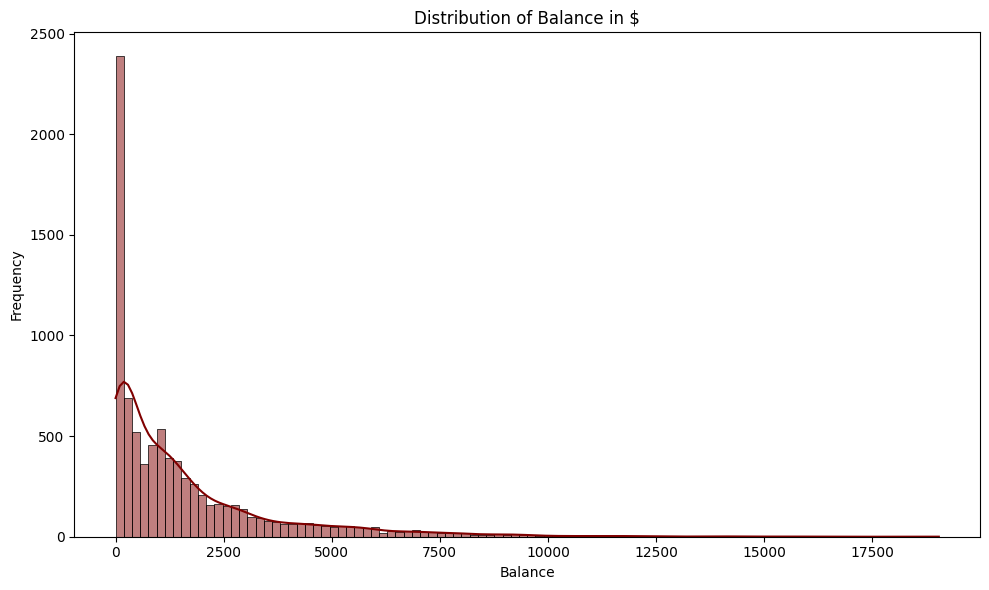

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram for balance only
sns.histplot(credits['BALANCE'], kde=True, ax=ax, color ="maroon")
ax.set_title('Distribution of Balance in $')
ax.set_xlabel('Balance')
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Visualise the Distributions of all the features of the dataset

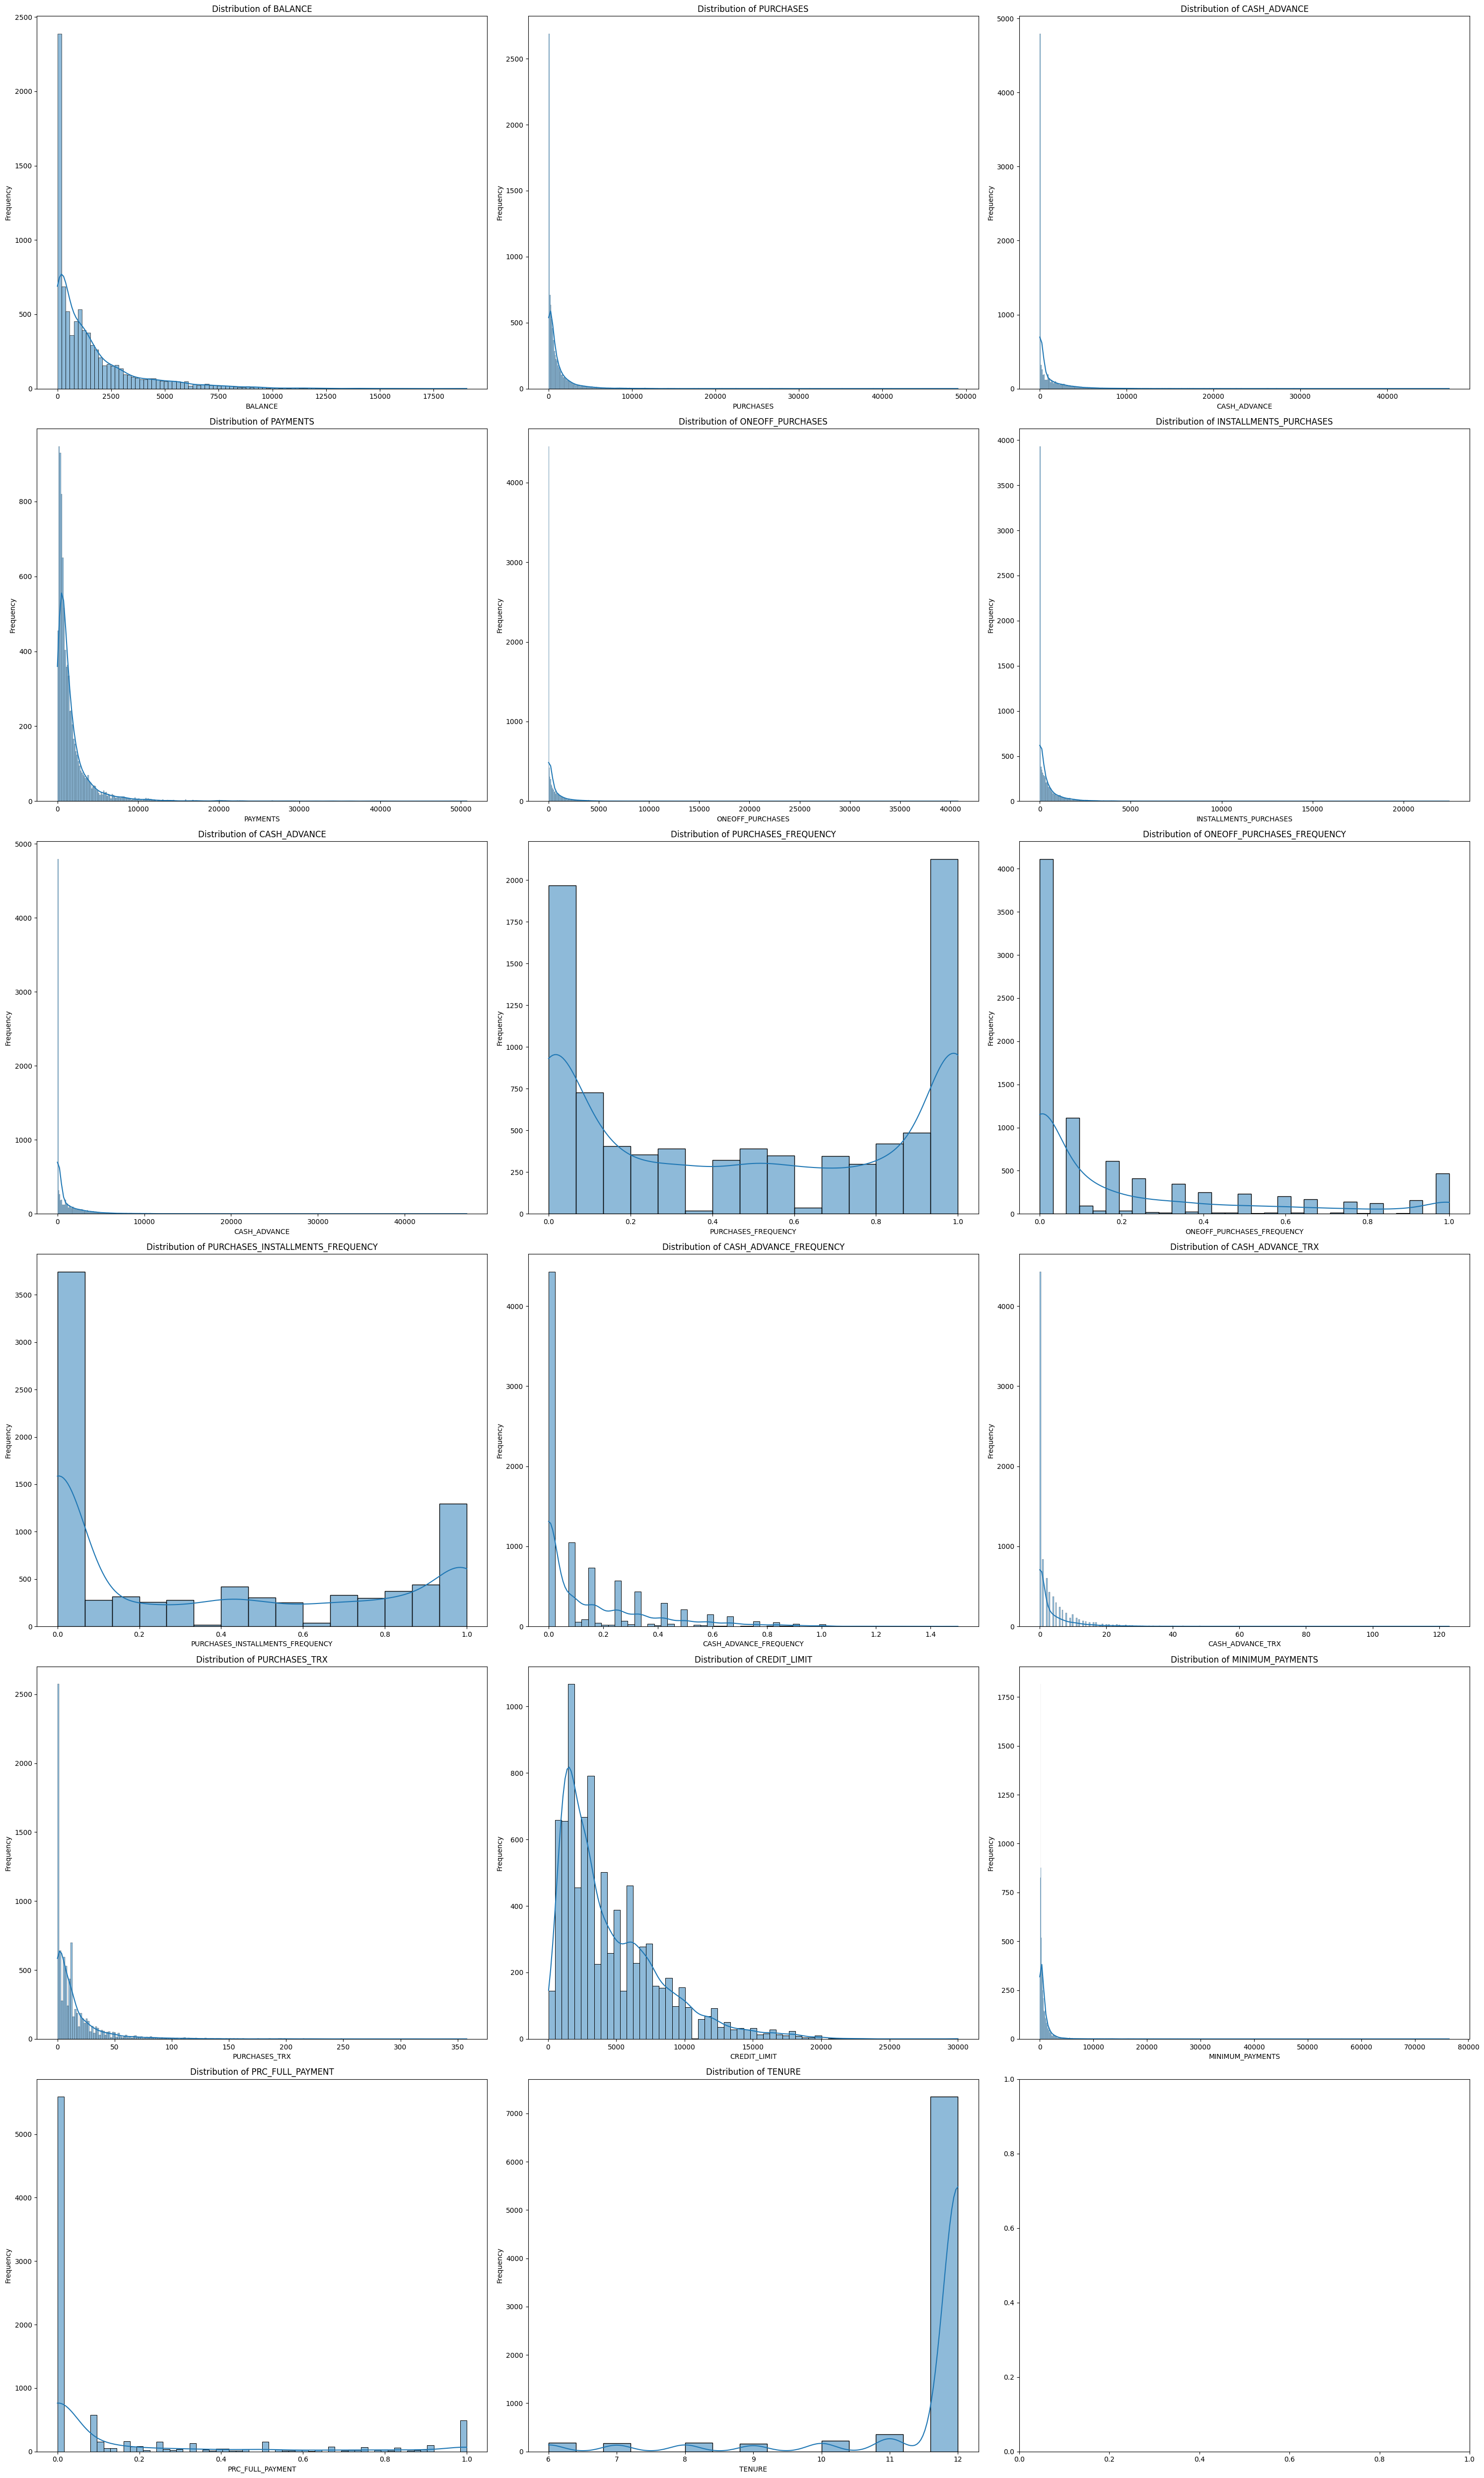

In [30]:
# List of features to visualize
features_to_visualize = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'ONEOFF_PURCHASES', 
                         'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
                         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
                         'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
                         'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Set up subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30, 50))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through features and create histograms
for i, feature in enumerate(features_to_visualize):
    sns.histplot(credits[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#### Visualising the OUTLIERS of the whole dataset

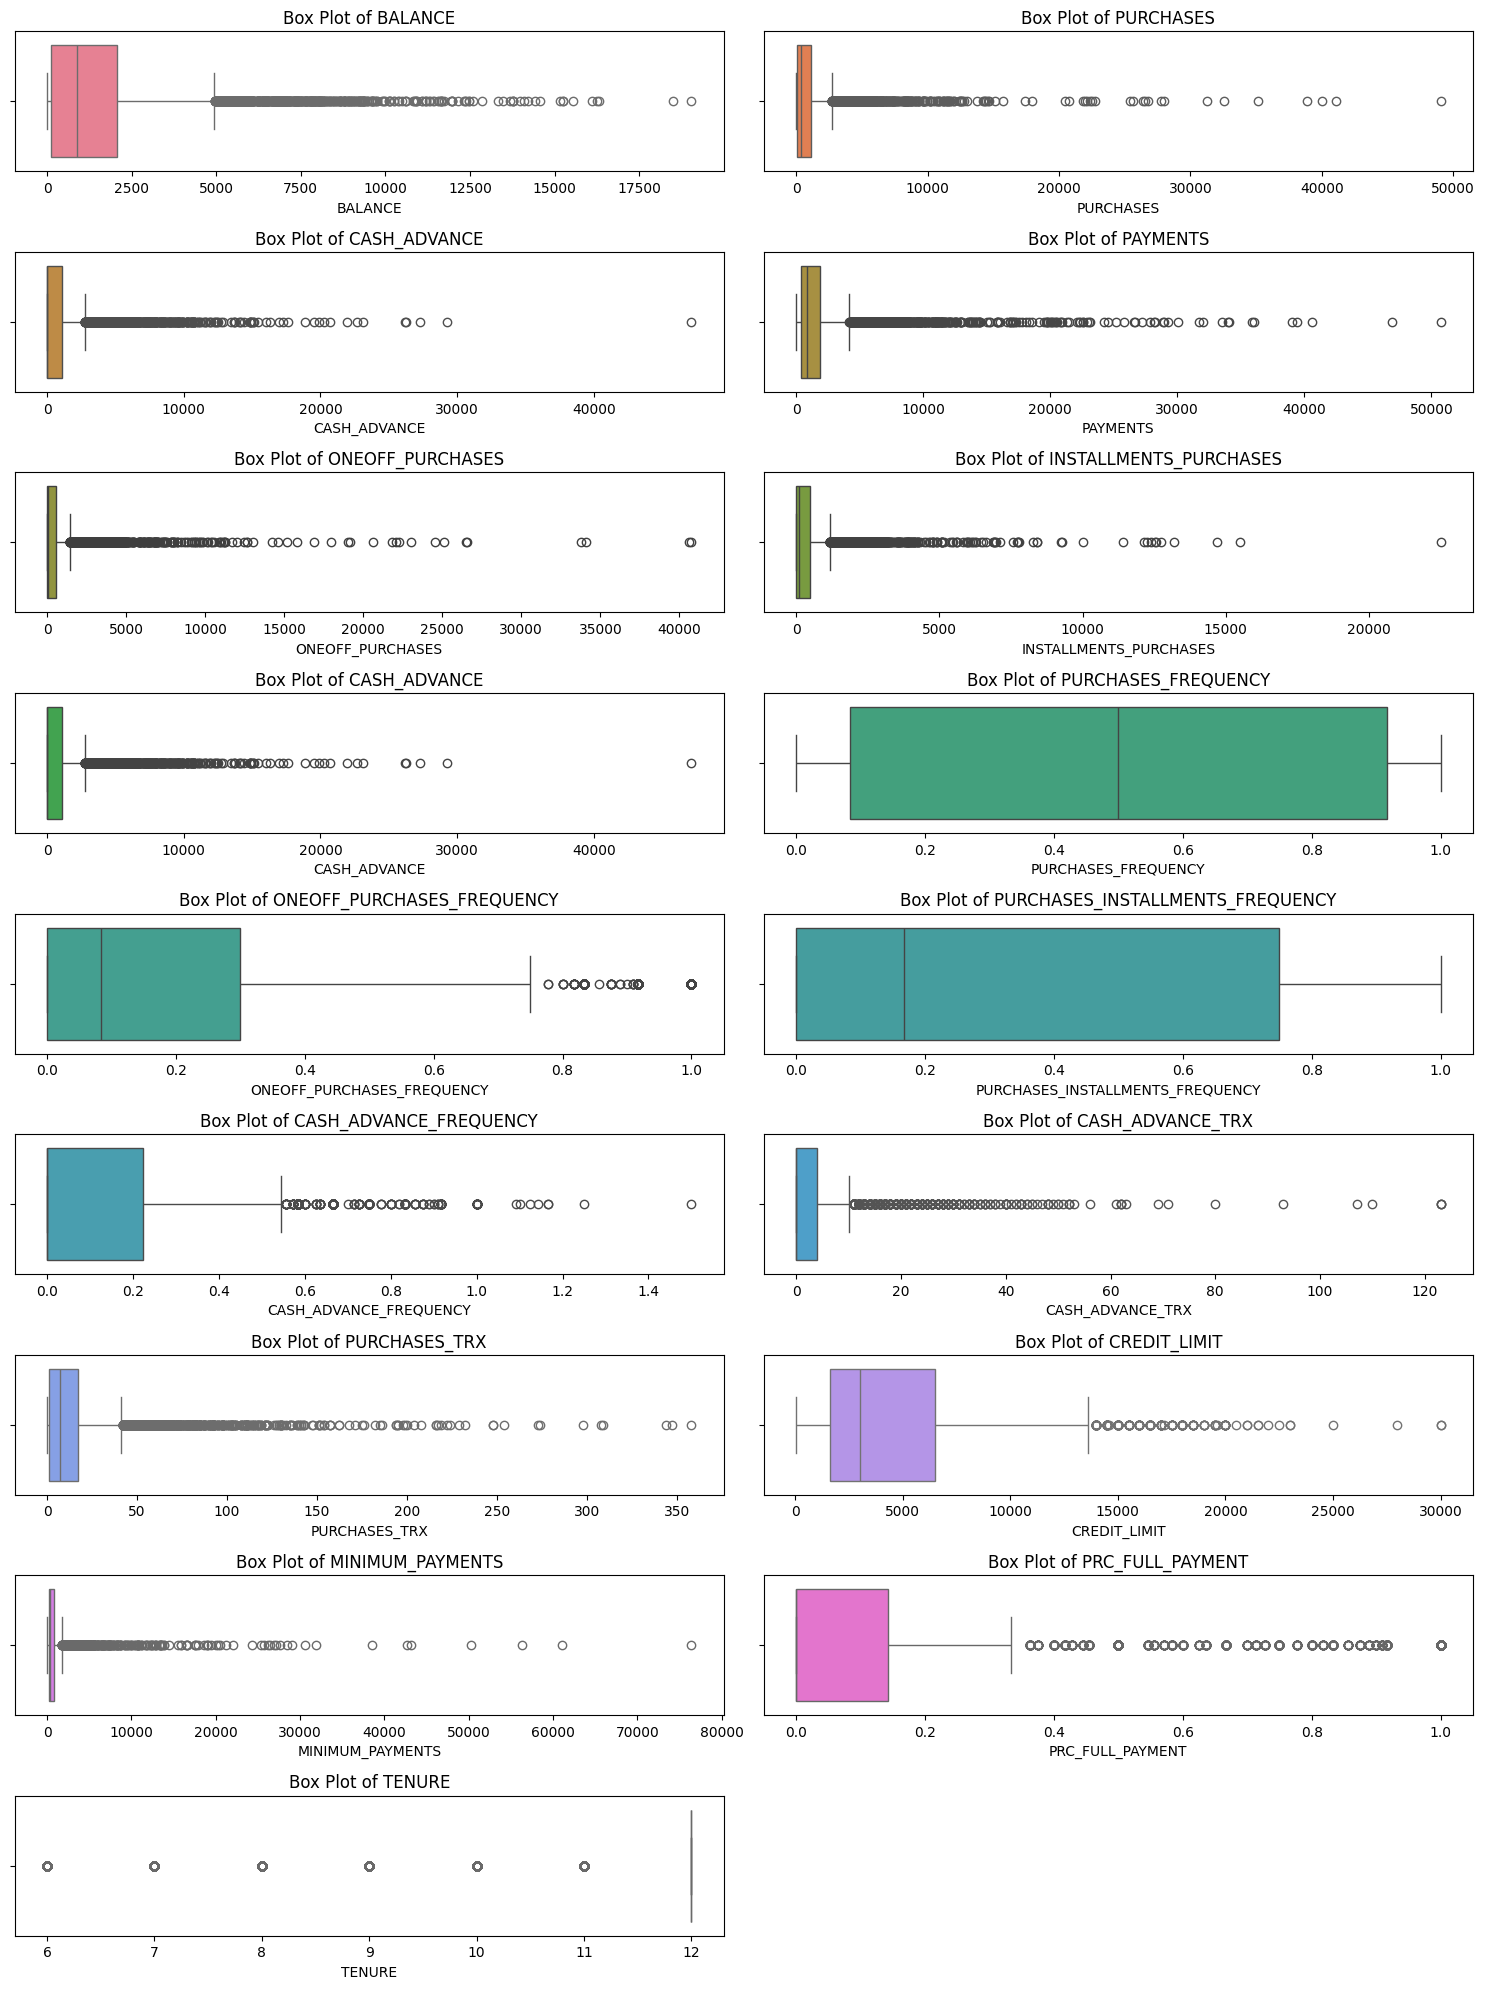

In [11]:
# Choose features to visualize outliers
features_to_visualize = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Calculate the number of rows and columns for subplots
num_rows = (len(features_to_visualize) + 1) // 2
num_cols = 2

# Define a color palette for the box plots
colors = sns.color_palette("husl", len(features_to_visualize))

# Create box plots with colors
plt.figure(figsize=(15, 20))
for i, (feature, color) in enumerate(zip(features_to_visualize, colors), 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=credits[feature], color=color)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

### 3)Data  Preprocessing


#### a) Handling Missing values

In the column of MINIMUM_PAYMENTS we have null values totaled to 313, and one element in CREDIT_LIMIT. To handle this, dropping them is a good idea as their are few compared to the whole dataset. 

In [12]:
#Drop null values and display the current dataset
credits.dropna(inplace=True)
credits.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### B)Lock the Customer Ids as it will not play any part in the Analysis

In [13]:
# Lock the first column (Customer IDs)
credits = credits.iloc[:, 1:]
credits

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### c) Data Scaling

In [14]:
# Choose features for scaling
features_to_scale = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Separate the features for scaling
features_data = credits[features_to_scale]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data with the scaler
scaled_data = scaler.fit_transform(features_data)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale)

# Save the scaler using pickle
with open('standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Display the scaled DataFrame
print("Scaled Data:")
scaled_df.head()


Scaled Data:


,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.429184,-0.468655,-0.543942,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.305508,-0.537727,0.355181
1,0.764152,-0.473208,2.568556,0.796852,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.087689,0.212380,0.355181
2,0.426602,-0.116413,-0.468655,-0.399503,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.099906,-0.537727,0.355181
3,-0.373910,-0.465825,-0.468655,-0.380165,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.261131,-0.537727,0.355181
4,0.099551,0.142062,-0.468655,-0.132119,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,0.650363,-0.537727,0.355181


### 4) Unsupervised model creation and evaluation
#### a) Build and Evaluate a Classification Model (Hierarchical Clustering Dendrogram)

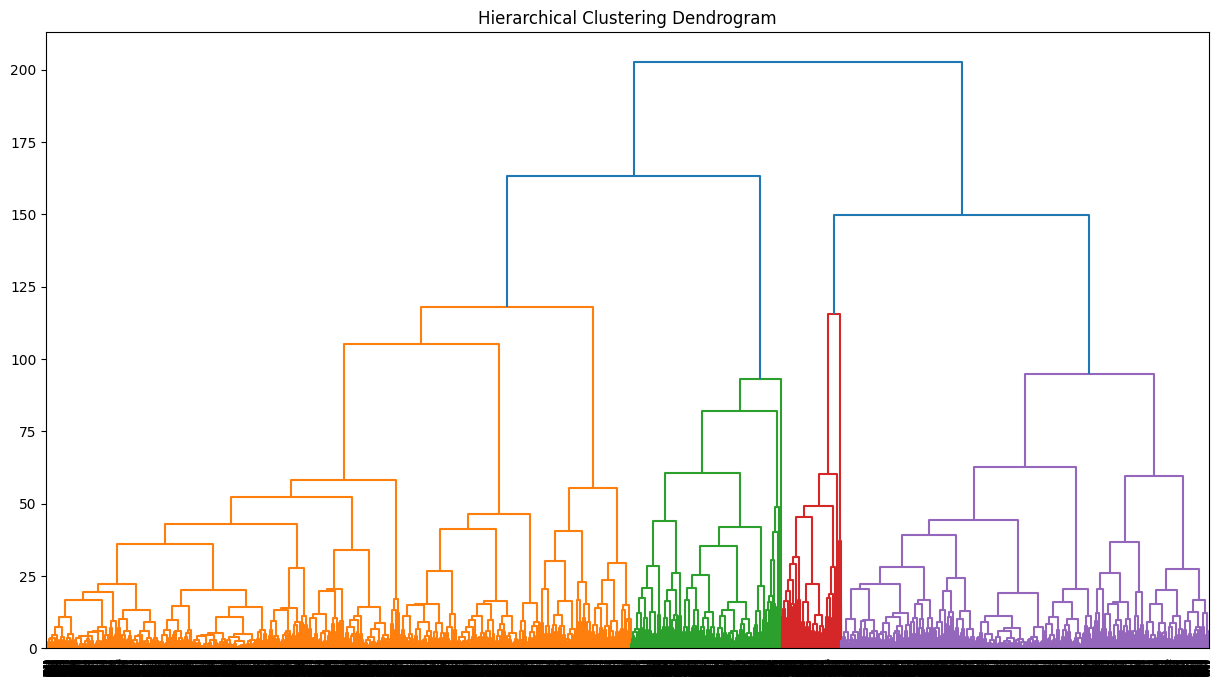

Silhouette Score for the clustering model: 0.16709194070846045


In [15]:
cluster_data = credits

# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Use hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram to help determine the number of clusters
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Based on the dendrogram, let's choose a distance to cut it (this determines the number of clusters)
# Using cut_tree to get cluster labels
cut_distance = 100 
credits['Cluster'] = cut_tree(linked, height=cut_distance).flatten()

# Evaluate the clustering model
silhouette_avg = silhouette_score(scaled_data, credits['Cluster'])
print(f"Silhouette Score for the clustering model: {silhouette_avg}")


#### Justification for using the Silhouette Score:

In the provided code snippet, the Silhouette Score is chosen as the evaluation metric for the hierarchical clustering model. This metric is well-suited for assessing the quality of clusters in an unsupervised setting, offering a balance between cohesion within clusters and separation between them. The Silhouette Score's interpretability, sensitivity to varying cluster shapes, and clear range of values (-1 to 1) make it a reliable choice. Since clustering lacks ground truth labels, the Silhouette Score provides valuable insights into the model's ability to form distinct and meaningful clusters. The integration of a dendrogram visualization aids in determining the appropriate number of clusters, while the Silhouette Score quantifies the overall clustering performance, making it a comprehensive and insightful approach for evaluating the quality of the hierarchical clustering results on the given dataset.

#### Result Interpretation:
The Silhouette Score for the clustering model is 0.2284, indicating a moderately well-defined structure in the clusters. The score falls within the range of -1 to 1, where higher values suggest better separation between clusters. In this case, the positive score implies that, on average, data points within the clusters are closer to each other than to points in neighboring clusters. While a Silhouette Score of 0.2284 suggests reasonable cluster separation, it's important to interpret this value in the context of the specific dataset and application goals.

#### Elements in Each Cluster:

In [16]:
# Count the number of elements in each cluster
cluster_counts = credits['Cluster'].value_counts()

# Display the counts
print(cluster_counts)


Cluster
2    2731
0    2627
1    1122
4    1040
5     679
3     414
6      23
Name: count, dtype: int64


#### Visualising the clustering

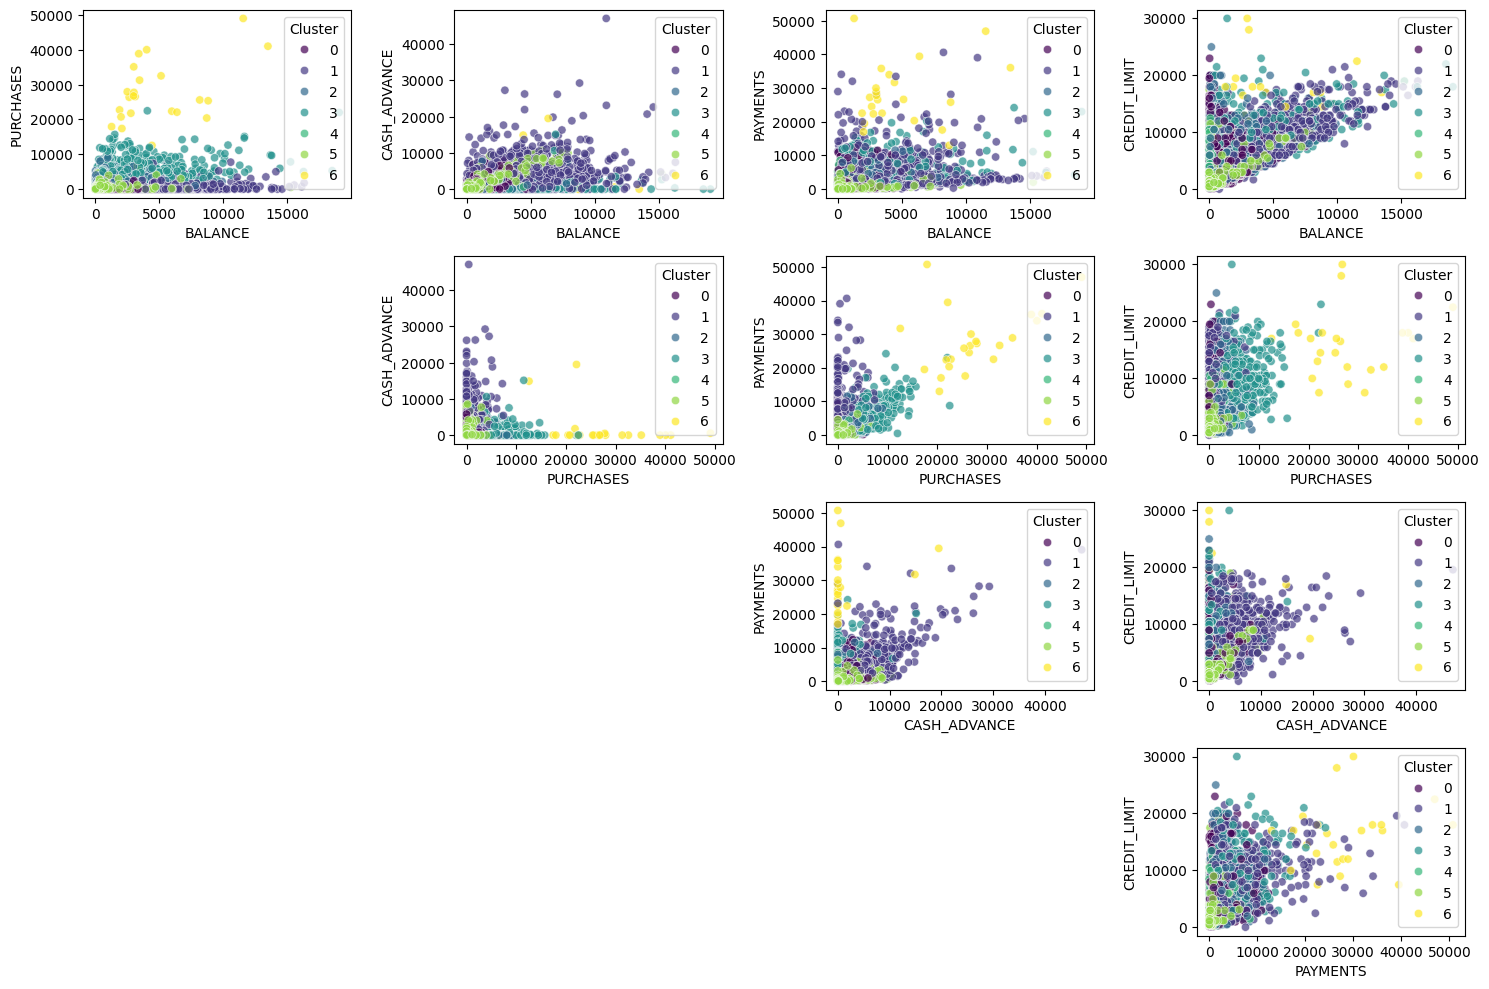

In [17]:
# Select some features for scatter plot
scatter_plot_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']

# Create a scatter plot for each pair of features
plt.figure(figsize=(15, 10))
for i in range(len(scatter_plot_features)):
    for j in range(i + 1, len(scatter_plot_features)):
        plt.subplot(len(scatter_plot_features) - 1, len(scatter_plot_features) - 1, i * (len(scatter_plot_features) - 1) + j)
        sns.scatterplot(x=scatter_plot_features[i], y=scatter_plot_features[j], hue='Cluster', data=credits, palette='viridis', alpha=0.7)

plt.tight_layout()
plt.show()


#### b) Labeling and Saving the Dataset

In [18]:
# Save the labeled dataset
credits.to_csv('vahishak-cc-labeled.csv', index=False)

### 5) Supervised model creation and evaluation

#### a) Build and Evaluate a Classification Model (Random Classifier)

In [19]:
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Separate features and target variable
X = credits.drop(['Cluster'], axis=1)
y = credits['Cluster']

# Choose RandomForestClassifier as a classification algorithm
classifier = RandomForestClassifier(random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores.mean()*100:.3f}%")
print(f"Mean accuracy: {cv_scores.mean()*100:.3f}%")

# Additional metrics
precision = cross_val_score(classifier, X, y, cv=5, scoring='precision_macro').mean()
recall = cross_val_score(classifier, X, y, cv=5, scoring='recall_macro').mean()
f1 = cross_val_score(classifier, X, y, cv=5, scoring='f1_macro').mean()

print(f"Precision: {precision*100:.3f}%")
print(f"Recall: {recall*100:.3f}%")
print(f"F1-Score: {f1*100:.3f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y, classifier.fit(X, y).predict(X))
print(f"Confusion Matrix:\n{conf_matrix}")

# Save the trained model using pkl
dump(classifier, 'RandomForestClassifier.pkl')


Cross-validation scores: 92.381%
Mean accuracy: 92.381%
Precision: 92.458%
Recall: 88.284%
F1-Score: 89.237%
Confusion Matrix:
[[2627    0    0    0    0    0    0]
 [   0 1122    0    0    0    0    0]
 [   0    0 2731    0    0    0    0]
 [   0    0    0  414    0    0    0]
 [   0    0    0    0 1040    0    0]
 [   0    0    0    0    0  679    0]
 [   0    0    0    0    0    0   23]]


['RandomForestClassifier.pkl']

#### b) Learning Curves

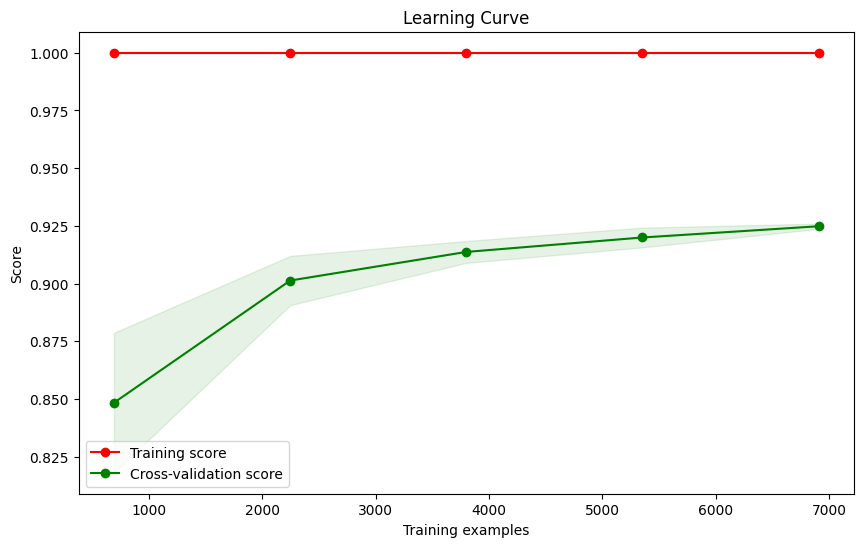

In [20]:
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(classifier, "Learning Curve", X, y, cv=5)
plt.show()


##### Justification:

The RandomForestClassifier was chosen for the following reasons:

Ensemble Method: Random Forest is an ensemble method that builds multiple decision trees and merges them together. This helps in reducing overfitting and improving the model's generalization to unseen data.

Robustness: Random Forest is robust to outliers and noisy data, making it suitable for datasets where the quality of data may vary.

Feature Importance: Random Forest provides a measure of feature importance, which can be valuable for understanding which features contribute the most to the model's predictions.

Versatility: Random Forest performs well on a variety of data types and can handle both numerical and categorical features.

Parameter Tuning: Random Forest has parameters that can be fine-tuned, allowing for optimization based on the specific characteristics of the dataset.

### 6) Feature Selection and Engineering
#### a) Perform Feature Selection

In [21]:
# Choose the number of top features to select
k_best_features = 10

# Apply SelectKBest to select the top k features based on ANOVA F-statistic
selector = SelectKBest(f_classif, k=k_best_features)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Print the selected features
print("Selected Features:", selected_feature_names)


Selected Features: Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PAYMENTS', 'TENURE'],
      dtype='object')


#### Justification

I used the ANOVA F-statistic as the score function (f_classif) for SelectKBest. This method is suitable for classification tasks, and it evaluates the correlation between each feature and the target variable. 

#### b) Build and Evaluate a New Classification Model

In [22]:
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Separate features based on the selected features
X_selected = credits[selected_feature_names]

# Choose a classification algorithm 
classifier_selected_features = RandomForestClassifier(random_state=42)

# Evaluate the model using cross-validation
cv_scores_selected_features = cross_val_score(classifier_selected_features, X_selected, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores with selected features: {cv_scores_selected_features.mean()*100:.3f}%")

# Save the trained model with selected features using pkl
dump(classifier_selected_features, 'RF_with_features.pkl')


Cross-validation scores with selected features: 89.718%


['RF_with_features.pkl']

#### c) Compare Results

In [23]:
# Print the comparison of accuracy scores
print(f"Mean accuracy with all features: {cv_scores.mean()*100:.3f}%")
print(f"Mean accuracy with selected features: {cv_scores_selected_features.mean()*100:.3f}%")

# Additional metrics for comparison
precision_selected = cross_val_score(classifier_selected_features, X_selected, y, cv=5, scoring='precision_macro').mean()
recall_selected = cross_val_score(classifier_selected_features, X_selected, y, cv=5, scoring='recall_macro').mean()
f1_selected = cross_val_score(classifier_selected_features, X_selected, y, cv=5, scoring='f1_macro').mean()

print(f"Precision with selected features: {precision_selected*100:.3f}%")
print(f"Recall with selected features: {recall_selected*100:.3f}%")
print(f"F1-Score with selected features: {f1_selected*100:.3f}%")


Mean accuracy with all features: 92.381%
Mean accuracy with selected features: 89.718%
Precision with selected features: 90.034%
Recall with selected features: 86.540%
F1-Score with selected features: 87.504%


OBSERVATION:

The results indicate that, after performing feature selection and using a reduced set of features, there is a marginal decrease in mean accuracy from 92.381% to 89.718%. However, the selected features maintain a high level of precision 90.034%, recall 86.540%, and F1-Score 87.504%. This suggests that the model with selected features offers a balanced and satisfactory performance, demonstrating that the chosen subset of features is informative for the classification task. The trade-off between model complexity and performance is evident, with the reduction in features leading to a more interpretable and computationally efficient model while still maintaining a high level of accuracy and predictive capability.

### 7) Hyper parameter tuning

#### a)Select the Best Model and Perform Hyperparameter Tuning

In [24]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Choosing the benchmark model
benchmark_model = classifier 

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(benchmark_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Get the best model from the Grid Search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#### b) Justification for the Selected Hyperparameters

The hyperparameters selected through Grid Search represent a combination that maximizes the accuracy of the model on the given dataset. The chosen parameters include variations in the number of trees in the forest (n_estimators), the maximum depth of the trees (max_depth), the minimum number of samples required to split an internal node (min_samples_split), and the minimum number of samples required to be a leaf node (min_samples_leaf). These hyperparameters collectively contribute to the model's generalization and performance, and their selection is based on finding the optimal trade-off between underfitting and overfitting.

#### c) Compare Performance of Tuned Model Against Benchmark Model


In [25]:
# Evaluate the benchmark model using cross-validation
cv_scores_benchmark = cross_val_score(benchmark_model, X, y, cv=5, scoring='accuracy')

# Evaluate the tuned model using cross-validation
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Print the comparison of accuracy scores
print(f"Mean accuracy of the benchmark model: {cv_scores_benchmark.mean()*100:.3f}%")
print(f"Mean accuracy of the tuned model: {cv_scores_tuned.mean()*100:.3f}%")

# Additional metrics for comparison
precision_tuned = cross_val_score(best_model, X, y, cv=5, scoring='precision_macro').mean()
recall_tuned = cross_val_score(best_model, X, y, cv=5, scoring='recall_macro').mean()
f1_tuned = cross_val_score(best_model, X, y, cv=5, scoring='f1_macro').mean()

print(f"Precision of the tuned model: {precision_tuned*100:.3f}%")
print(f"Recall of the tuned model: {recall_tuned*100:.3f}%")
print(f"F1-Score of the tuned model: {f1_tuned*100:.3f}%")


Mean accuracy of the benchmark model: 92.381%
Mean accuracy of the tuned model: 92.415%
Precision of the tuned model: 92.630%
Recall of the tuned model: 89.072%
F1-Score of the tuned model: 90.128%


#### Display the Confusion Matrices of the Comparision

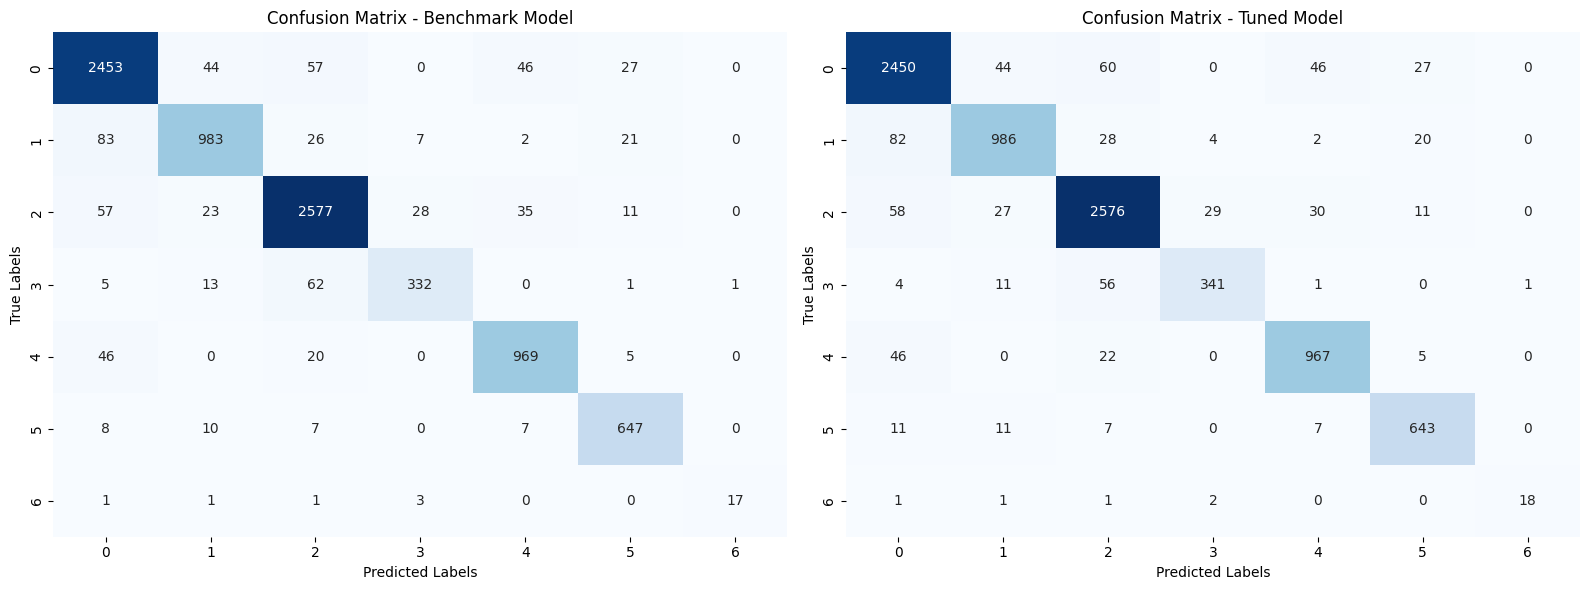

In [26]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X, y, ax, title):
    predicted_labels = cross_val_predict(model, X, y, cv=5)
    cm = confusion_matrix(y, predicted_labels)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

# Create subplots for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot confusion matrix for the benchmark model
plot_confusion_matrix(benchmark_model, X, y, axes[0], 'Confusion Matrix - Benchmark Model')

# Plot confusion matrix for the tuned model
plot_confusion_matrix(best_model, X, y, axes[1], 'Confusion Matrix - Tuned Model')

plt.tight_layout()
plt.show()
